In [1]:
import os
import pandas as pd
import itertools
#pd.options.mode.chained_assignment = None  # default='warn' #turn off the SettingWithCopyWarning
import numpy as np
import math
import requests

import matplotlib 
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib as mpl
from matplotlib.dates import YearLocator, DateFormatter
#%matplotlib notebook

import datetime
from dateutil import parser, rrule
from datetime import datetime, time, date

from dateutil.relativedelta import relativedelta

import scipy
from scipy import stats

# from IPython.display import display, HTML
# display(HTML(data=""" <style>
#     div#notebook-container    { width: 95%; }
#     div#menubar-container     { width: 85%; }
#     div#maintoolbar-container { width: 99%; } </style> """))

## Read in Files from WL data Download and Station Metadata Download

In [2]:
#Choose date of WL data download
date = '2024-09-27'
#path to file
UHSLC = os.path.join("..", "Data", "WL_Data{}".format(date), "UHSLC")
USGS = os.path.join("..", "Data", "WL_Data{}".format(date), "USGS")

#read the USGS files
ALL_WL_data = {}
for file in os.listdir(USGS):
    df = pd.read_csv(os.path.join(USGS, file))
    data = pd.DataFrame()
    data['data'] = df['value']
    data['date'] = df['dateTime']
    ALL_WL_data['USGS_'+ file.split('.')[0]] = data

#read the UHSLC files
for file in os.listdir(UHSLC):
    df = pd.read_csv(os.path.join(UHSLC, file))
    data = pd.DataFrame()
    data['data'] = df['data']
    data['date'] = df['date']
    ALL_WL_data[file.split('.')[0]] = data

#delete the test station on OAHU:
del ALL_WL_data['EDD11398']

#read station meta ***ADDED USGS METADATA***
# then Grab the station metadata for each of the reservoirs from SLC website

Station_Meta = pd.read_csv('station_meta.csv')   ## Download the metadata
#meta.columns = df.columns.str.replace('geometry.', '', regex=False).str.replace('properties.', '', regex=False)  # clean up column headers 

C:\Users\bgorb\AppData\Local\Temp\ipykernel_19972\995941532.py:18: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(UHSLC, file))
C:\Users\bgorb\AppData\Local\Temp\ipykernel_19972\995941532.py:18: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(UHSLC, file))


## resample to DAILY data, shift time, convert to right units

In [3]:
daily_dic = {}

for ID in ALL_WL_data:
    print(ID)
    data = ALL_WL_data[ID]
    ALL_WL_data[ID]['date'] = pd.to_datetime(ALL_WL_data[ID]['date'])
    data = data.replace(-66577, np.nan)
    data = data.replace(131071, np.nan)
    data = data.replace(-999999.00, np.nan)
    
    # Data now comes in with a timezone aware index and in GMT, as its easier to work in HST, just remove timezone and convert to HST 
    data = data.set_index('date')
    data = data.tz_localize(None)         # Scrub out the Timezone awareness of the index 
    data.shift(-10, freq='H')             # Shift the timestamp back 10 hrs 
    
    # Convert from decimal feet to ft. 
    if 'E' in ID:
        data['data'] = data['data']/100
    
    #resample data to daily 
    data_daily =  data.resample('1D').mean() 
    
    # record daily files in a dictionary of dataframes
    daily_dic[ID] = data_daily
    
daily_dic.keys()

USGS_16094150


C:\Users\bgorb\AppData\Local\Temp\ipykernel_19972\3996252550.py:14: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  data.shift(-10, freq='H')             # Shift the timestamp back 10 hrs


USGS_16206600
USGS_16208400


C:\Users\bgorb\AppData\Local\Temp\ipykernel_19972\3996252550.py:14: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  data.shift(-10, freq='H')             # Shift the timestamp back 10 hrs
C:\Users\bgorb\AppData\Local\Temp\ipykernel_19972\3996252550.py:14: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  data.shift(-10, freq='H')             # Shift the timestamp back 10 hrs


USGS_16210000


C:\Users\bgorb\AppData\Local\Temp\ipykernel_19972\3996252550.py:14: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  data.shift(-10, freq='H')             # Shift the timestamp back 10 hrs


USGS_213133158014201


C:\Users\bgorb\AppData\Local\Temp\ipykernel_19972\3996252550.py:14: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  data.shift(-10, freq='H')             # Shift the timestamp back 10 hrs


USGS_213308158035601


C:\Users\bgorb\AppData\Local\Temp\ipykernel_19972\3996252550.py:14: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  data.shift(-10, freq='H')             # Shift the timestamp back 10 hrs


USGS_213320158061401
EDD00214


C:\Users\bgorb\AppData\Local\Temp\ipykernel_19972\3996252550.py:14: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  data.shift(-10, freq='H')             # Shift the timestamp back 10 hrs
C:\Users\bgorb\AppData\Local\Temp\ipykernel_19972\3996252550.py:14: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  data.shift(-10, freq='H')             # Shift the timestamp back 10 hrs


EDD00CC6
EDD01162


C:\Users\bgorb\AppData\Local\Temp\ipykernel_19972\3996252550.py:14: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  data.shift(-10, freq='H')             # Shift the timestamp back 10 hrs
C:\Users\bgorb\AppData\Local\Temp\ipykernel_19972\3996252550.py:14: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  data.shift(-10, freq='H')             # Shift the timestamp back 10 hrs


EDD024F8


C:\Users\bgorb\AppData\Local\Temp\ipykernel_19972\3996252550.py:14: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  data.shift(-10, freq='H')             # Shift the timestamp back 10 hrs


EDD02A2A


C:\Users\bgorb\AppData\Local\Temp\ipykernel_19972\3996252550.py:14: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  data.shift(-10, freq='H')             # Shift the timestamp back 10 hrs


EDD0378E


C:\Users\bgorb\AppData\Local\Temp\ipykernel_19972\3996252550.py:14: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  data.shift(-10, freq='H')             # Shift the timestamp back 10 hrs


EDD0395C


C:\Users\bgorb\AppData\Local\Temp\ipykernel_19972\3996252550.py:14: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  data.shift(-10, freq='H')             # Shift the timestamp back 10 hrs


EDD0411E


C:\Users\bgorb\AppData\Local\Temp\ipykernel_19972\3996252550.py:14: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  data.shift(-10, freq='H')             # Shift the timestamp back 10 hrs


EDD04FCC


C:\Users\bgorb\AppData\Local\Temp\ipykernel_19972\3996252550.py:14: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  data.shift(-10, freq='H')             # Shift the timestamp back 10 hrs


EDD05268


C:\Users\bgorb\AppData\Local\Temp\ipykernel_19972\3996252550.py:14: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  data.shift(-10, freq='H')             # Shift the timestamp back 10 hrs


EDD05CBA


C:\Users\bgorb\AppData\Local\Temp\ipykernel_19972\3996252550.py:14: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  data.shift(-10, freq='H')             # Shift the timestamp back 10 hrs


EDD067F2


C:\Users\bgorb\AppData\Local\Temp\ipykernel_19972\3996252550.py:14: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  data.shift(-10, freq='H')             # Shift the timestamp back 10 hrs


EDD06920
EDD07484


C:\Users\bgorb\AppData\Local\Temp\ipykernel_19972\3996252550.py:14: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  data.shift(-10, freq='H')             # Shift the timestamp back 10 hrs
C:\Users\bgorb\AppData\Local\Temp\ipykernel_19972\3996252550.py:14: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  data.shift(-10, freq='H')             # Shift the timestamp back 10 hrs


EDD07A56


C:\Users\bgorb\AppData\Local\Temp\ipykernel_19972\3996252550.py:14: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  data.shift(-10, freq='H')             # Shift the timestamp back 10 hrs


EDD08400


C:\Users\bgorb\AppData\Local\Temp\ipykernel_19972\3996252550.py:14: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  data.shift(-10, freq='H')             # Shift the timestamp back 10 hrs


EDD08AD2
EDD099A4


C:\Users\bgorb\AppData\Local\Temp\ipykernel_19972\3996252550.py:14: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  data.shift(-10, freq='H')             # Shift the timestamp back 10 hrs
C:\Users\bgorb\AppData\Local\Temp\ipykernel_19972\3996252550.py:14: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  data.shift(-10, freq='H')             # Shift the timestamp back 10 hrs


EDD0A2EC
EDD0AC3E


C:\Users\bgorb\AppData\Local\Temp\ipykernel_19972\3996252550.py:14: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  data.shift(-10, freq='H')             # Shift the timestamp back 10 hrs
C:\Users\bgorb\AppData\Local\Temp\ipykernel_19972\3996252550.py:14: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  data.shift(-10, freq='H')             # Shift the timestamp back 10 hrs


EDD0B19A
EDD0BF48


C:\Users\bgorb\AppData\Local\Temp\ipykernel_19972\3996252550.py:14: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  data.shift(-10, freq='H')             # Shift the timestamp back 10 hrs
C:\Users\bgorb\AppData\Local\Temp\ipykernel_19972\3996252550.py:14: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  data.shift(-10, freq='H')             # Shift the timestamp back 10 hrs


EDD0C70A
EDD0C9D8


C:\Users\bgorb\AppData\Local\Temp\ipykernel_19972\3996252550.py:14: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  data.shift(-10, freq='H')             # Shift the timestamp back 10 hrs
C:\Users\bgorb\AppData\Local\Temp\ipykernel_19972\3996252550.py:14: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  data.shift(-10, freq='H')             # Shift the timestamp back 10 hrs


EDD0D47C
EDD0DAAE


C:\Users\bgorb\AppData\Local\Temp\ipykernel_19972\3996252550.py:14: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  data.shift(-10, freq='H')             # Shift the timestamp back 10 hrs
C:\Users\bgorb\AppData\Local\Temp\ipykernel_19972\3996252550.py:14: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  data.shift(-10, freq='H')             # Shift the timestamp back 10 hrs


dict_keys(['USGS_16094150', 'USGS_16206600', 'USGS_16208400', 'USGS_16210000', 'USGS_213133158014201', 'USGS_213308158035601', 'USGS_213320158061401', 'EDD00214', 'EDD00CC6', 'EDD01162', 'EDD024F8', 'EDD02A2A', 'EDD0378E', 'EDD0395C', 'EDD0411E', 'EDD04FCC', 'EDD05268', 'EDD05CBA', 'EDD067F2', 'EDD06920', 'EDD07484', 'EDD07A56', 'EDD08400', 'EDD08AD2', 'EDD099A4', 'EDD0A2EC', 'EDD0AC3E', 'EDD0B19A', 'EDD0BF48', 'EDD0C70A', 'EDD0C9D8', 'EDD0D47C', 'EDD0DAAE'])

VERY IMPORTANT TO NOTE THAT SOME OF THE REFERENCE DATUMS CHANGE THROUGH TIME. FOR EXAMPLE 'EDD07484' GOES FROM THE 200+ FT WATERLEVEL TO LESS THAN 10. 

WE NEED TO OMIT ALL DATA THAT IS OUTSIDE OF THE ALERT RANGE TO GET AN ACCURATE ASSESSMENT OF STATISTICS AND ALERT CLASSIFICATIONS

ALL DATA CAN BE KEPT FOR THE TREND CLASSIFICATION BECAUSE WE ARE NOT CONCERNED ABOUT THE ACTUAL WATER LEVEL. RATHER WE ARE CONCERNED ABOUT THE CHANGES IN WL. 

In [4]:
files = []
ranges = []
start_alert = []
for key in daily_dic: 
    files.append(key)
    ranges.append(daily_dic[key].data.max() - daily_dic[key].data.min())
    Station_Meta = Station_Meta.set_index('id')
    start_alert.append(Station_Meta['properties.level_alert_on'][key]) #start alert from meta data table
    Station_Meta = Station_Meta.reset_index()
    
data_ommitting_stats = {'file': files, 'range': ranges, 'alert': start_alert}
ommit_df = pd.DataFrame.from_dict(data_ommitting_stats)

ommit_data = []
print('These reservoirs might have a datum shift that is not defined by the DLNR or UHSLC. Use the plot function to determine more details')
for i in range(len(ommit_df)):
    if ommit_df['range'][i] > 100:
        print(ommit_df.file[i])
        ommit_data.append(ommit_df.file[i])

daily_dic_ommitted = daily_dic
# Define the threshold

for i in ommit_data:
    Station_Meta = Station_Meta.set_index('id')
    start_alert = Station_Meta['properties.level_alert_on'][i] #start alert from meta data table
    Station_Meta = Station_Meta.reset_index()
    threshold = start_alert + 50
    
    daily_dic_ommitted[i] = daily_dic_ommitted[i].drop(daily_dic_ommitted[i][daily_dic_ommitted[i]['data'] > threshold].index)

# Remove outliers based on a certain number of standard deviations from the mean 
# Probably could use a more advanced filtering method later if need

for key in daily_dic_ommitted:
    STDs = 3
    data = daily_dic_ommitted[key]
    data = data[((data['data'] - data['data'].mean()) / data['data'].std()).abs() < STDs]
    #resample data to daily 
    data_daily =  data.resample('1D').mean() 
    daily_dic_ommitted[key] = data_daily

These reservoirs might have a datum shift that is not defined by the DLNR or UHSLC. Use the plot function to determine more details
EDD02A2A
EDD06920
EDD07484
EDD08400


# Statistics for Each Reservoir

In [5]:
#pull together some stats for each reservoir
ids = []
mean = []
minimum = [] 
maximum = []
stdev = []
median = []

for key in daily_dic_ommitted:
    ids.append(key)
    
    mean_= daily_dic_ommitted[key].data.mean(skipna = True)
    mean.append(mean_)
    
    minimum_ = daily_dic_ommitted[key].data.min()
    minimum.append(minimum_)
    
    maximum_ = daily_dic_ommitted[key].data.max()
    maximum.append(maximum_)
    
    median_ = daily_dic_ommitted[key].data.median()
    median.append(median_)
    
    stdev_ = daily_dic_ommitted[key].data.std()
    stdev.append(stdev_)

#create dataframe
stats_dic = {'file_id': ids, 'mean': mean, 'minimum': minimum, 'maximum' : maximum, 'median': median, 'standard_deviation' : stdev}
stats_df = pd.DataFrame.from_dict(stats_dic)

#get the dlnrid
Station_Meta = Station_Meta.set_index('id')
dlnrid = []
for i in stats_df.file_id:
    dlnrid_ = Station_Meta['properties.dlnrid'][i]
    dlnrid.append(dlnrid_)

#add dlnrid
stats_df['dlrnid'] = np.nan
stats_df['dlrnid'] = dlnrid

#save csv file
stats_df.to_csv('reservoir_WL_stats.csv')
Station_Meta = Station_Meta.reset_index()

In [6]:
stats_df

,file_id,mean,minimum,maximum,median,standard_deviation,dlrnid
0,USGS_16094150,19.446041,17.378993,22.521250,19.532135,1.022851,KA-0030
1,USGS_16206600,5.888019,5.874161,6.112049,5.887390,0.010927,OA-0156
2,USGS_16208400,15.241238,12.659896,20.153542,17.219271,2.231631,OA-0025
3,USGS_16210000,69.601207,56.730625,81.970455,68.676479,5.095888,OA-0017
4,USGS_213133158014201,40.512630,27.520000,46.218555,41.614549,4.332795,OA-0022
5,USGS_213308158035601,22.998348,19.580000,26.449653,23.028490,1.122013,OA-0023
6,USGS_213320158061401,17.300972,13.296354,20.810521,17.265990,1.351317,OA-0021
7,EDD00214,14.679861,12.640578,17.610000,14.694930,0.891987,KA-0099
8,EDD00CC6,8.619553,6.923026,15.967289,8.264056,1.478044,KA-0010
9,EDD01162,-2.316696,-2.643333,-1.860171,-2.321961,0.148376,MA-0073


# Determine the start date, end date of data, duration, and completeness (UHSLC datum change doesn't matter for this one)

In [7]:
def reservoir_WL_metadata(WaterLevel_data, WaterLevel_dates):
    WaterLevel_dates = pd.to_datetime(WaterLevel_dates)
    
    #end and start date
    end_date = WaterLevel_dates.max()
    start_date = WaterLevel_dates.min()
    
    #calculate total duration of data
    duration = (end_date - start_date)/np.timedelta64(1, 'D')/365
    
    #calculate data frequency
    datapoint_frequency = WaterLevel_dates[1] - WaterLevel_dates[0]
    
    #calculate percent completenes
    n_total_datas = len(WaterLevel_data)
    total_nan = np.count_nonzero(np.isnan(np.array(WaterLevel_data))) #count number of values in array equal to NaN
    completeness = 1 - total_nan / n_total_datas
    
    df = pd.DataFrame({'end_date': end_date , 'start_date' : start_date, 'duration' : duration, 'completeness' : completeness, 'data_timestep' : datapoint_frequency}, index = [0])
   
    return df

In [8]:
#calculate the duration, start , end, completeness
Reservoir_WL_completness = {}
for file in daily_dic:
    #get a list of the water level data and dates recored for function above
    WaterLevel_data = daily_dic[file].data
    WaterLevel_dates = daily_dic[file].index
    
    #use the function above to figure out duration, sstart, end, completness
    Reservoir_WL_completness[file] = reservoir_WL_metadata(WaterLevel_data, WaterLevel_dates)
    
#combine all the reservoir data into one variable
result = pd.concat(Reservoir_WL_completness).rename_axis(['Reservoir_station_file', 'whatever']).reset_index().drop('whatever', axis = 1)


#Create dataframe that shows dlnr id and the data duration, completeness, start, end dates
result['dlnrid'] = np.nan
station_merge_meta = Station_Meta[['properties.dlnrid', 'id']].copy()

i = 0
for ID in result.Reservoir_station_file:
    element = ID
    index_location = station_merge_meta.index[station_merge_meta['id'] == element].tolist()
    dlnrid = station_merge_meta['properties.dlnrid'][index_location]
    result.dlnrid[i] = dlnrid[index_location[0]]
    i += 1

result.to_csv('reservoir_data_completeness_info.csv')

C:\Users\bgorb\AppData\Local\Temp\ipykernel_19972\2169600631.py:24: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  result.dlnrid[i] = dlnrid[index_location[0]]
C:\Users\bgorb\AppData\Local\Temp\ipykernel_19972\2169600631.py:24: SettingWithCop

### Total Data Duration and Completeness Graph by STATE

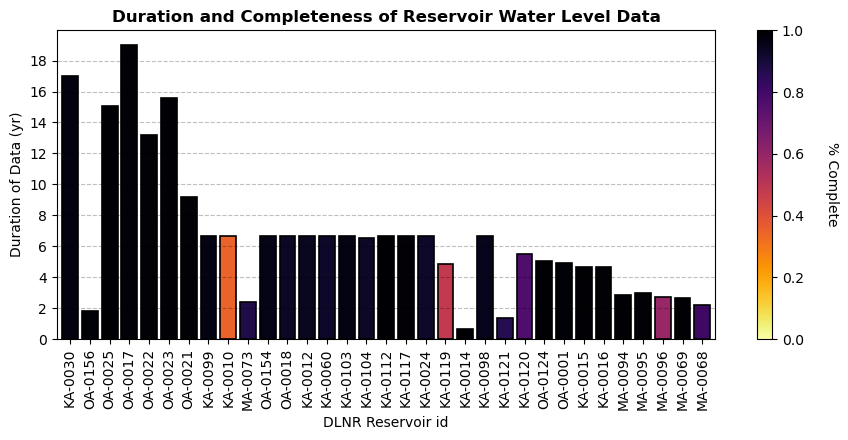

In [9]:
data_info = result  # Assuming result is your data

# Create Barplot:
fig, ax = plt.subplots(figsize=(9, 4.5))

# Creating color map and color data
my_cmap = plt.get_cmap('inferno_r')
data_color = data_info.completeness
normmin = 0
normmax = 1
data_color = [(x - normmin) / (normmax - normmin) for x in data_color]
colors = my_cmap(data_color)

# Normalize for colorbar
norm = mpl.colors.Normalize(vmin=0, vmax=1)
sm = plt.cm.ScalarMappable(cmap=my_cmap, norm=norm)
sm.set_array([])  # Required for ScalarMappable

# Adding colorbar
cbar = plt.colorbar(sm, ax=ax)  # Associating with current axis (ax)
cbar.set_label('% Complete', rotation=270, labelpad=25)

# Bar graphs
rects = ax.bar(data_info.dlnrid, data_info.duration, color=colors, edgecolor='black', linewidth=1.2)

# Set ticks
plt.xticks(rotation=90, ha='center')
plt.yticks(np.arange(0, 20, 2))

# The one year line (uncomment if you need it)
# ax.axhline(y=1, color='r', linestyle='-') 

# Labels and margins
plt.title('Duration and Completeness of Reservoir Water Level Data', fontweight='bold')
ax.set_xlabel('DLNR Reservoir id')
ax.set_ylabel('Duration of Data (yr)')

ax.margins(x=0.008, y=0.05)
plt.tight_layout()

# Grid and save plot
plt.grid(color='black', which='major', axis='y', linestyle='dashed', alpha=0.25)
plt.savefig('dur_comp_res_data.png')

plt.show()

# Determine Response Rating Based on the Alert Levels

In [10]:
def hydrologic_response_rating(WaterLevel_data, start_alert_WL, stop_alert_WL):
    
    hydrologic_response = 'unknown'

    #WL goes above the alert level = HAZARD
    for i in WaterLevel_data: 
        if i > start_alert_WL:
            hydrologic_response = 'hazard'

    #WL never goes above alert level, but does go above the stop level = PROBLEM       
    if hydrologic_response  == 'unknown':
        for i in WaterLevel_data: 
            if i > stop_alert_WL:
                hydrologic_response  = 'problem'

    #WL never goes above the alert or stop levels = SAFE
    if hydrologic_response  == 'unknown':
        hydrologic_response = 'safe'

    if math.isnan(start_alert_WL) == True: 
        hydrologic_response = 'unknown'
    return hydrologic_response 

In [11]:
#determine station rating given alerts
hydrologic_response= {}

Station_Meta = Station_Meta.set_index('id')
for file in daily_dic:
    
    #get the Water level alert levels from the SLC id in meta data table
    station_name = file #.split('.')[0].split('_')[1] #split the WL_..... file so that the SLC id is the only letters (remove WL_ and remove .csv)

    start_alert_WL = Station_Meta['properties.level_alert_on'][station_name] #start alert from meta data table
    stop_alert_WL = Station_Meta['properties.level_alert_off'][station_name] #stop alert from meta data table

    #create a list of Waterlevel data
    WaterLevel_data = daily_dic[file]['data']

    #determine the station rating using function above
    station_rating = hydrologic_response_rating(WaterLevel_data, start_alert_WL, stop_alert_WL)
    
    #create a dictionary of hydrologic response ratings
    hydrologic_response[file] = station_rating

# create dataframe for hydrologic response to save as a table
data_info = data_info.set_index('Reservoir_station_file')

dlnrid = []
response_rating = []
for key in hydrologic_response:
    dlnrid.append(data_info['dlnrid'][key])
    response_rating.append(hydrologic_response[key])
    
hydrologic_response_dlnrid = pd.DataFrame({'dlnrid' : dlnrid, 'response_rating' : response_rating})
hydrologic_response_dlnrid.to_csv('alert_level_response_ratings.csv')

data_info = data_info.reset_index()
Station_Meta = Station_Meta.reset_index()

### Total Hydrologic Response Ratings in all of the reservoirs (ratings are based on alerts)

In [12]:
hazard = 0
problem = 0
safe = 0
unknown = 0

for file in hydrologic_response:
    if hydrologic_response[file] == 'hazard':
        hazard += 1
    elif hydrologic_response[file] == 'problem':
        problem += 1
    elif hydrologic_response[file] == 'unknown':
        unknown += 1
    else:
        safe += 1
        
        
print('hazard: ' + str(hazard))
print('problem: ' + str(problem))
print('safe: ' + str(safe))
print('unknown: ' + str(unknown))

hazard: 12
problem: 2
safe: 12
unknown: 7


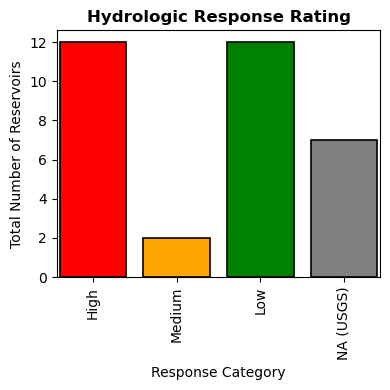

In [13]:
#Create Barplot:
fig, ax = plt.subplots(figsize=(4, 4))

#bars
rects = ax.bar(['High', 'Medium', 'Low', 'NA (USGS)'], [hazard, problem, safe, unknown], color = ['red', 'orange', 'green', 'gray'], edgecolor='black', linewidth=1.2)
plt.xticks(rotation=90, ha='center')
plt.bar

#labels
plt.title('Hydrologic Response Rating', fontweight  = 'bold')
ax.set_xlabel('Response Category')
ax.set_ylabel('Total Number of Reservoirs')

#margins and stuff
ax.margins(x=0.008, y=0.05)
plt.tight_layout()

plt.savefig('Hydrologic_Response_by_category.png')

# Find the highest water level and time during alert, duration of alert, 

In [14]:
#create a list of Waterlevel data
#have to give it the waterlevel data dictionary, the file, and station_meta
def get_alert_info(Station_Meta, file, daily_dic):
    WaterLevel_data = daily_dic[file]
    WaterLevel_data = WaterLevel_data.reset_index()
    
    Station_Meta = Station_Meta.set_index('id')
    stop_alert_WL = Station_Meta['properties.level_alert_off'][file] #start alert from meta data table
    start_alert_WL = Station_Meta['properties.level_alert_on'][file] #stop alert from meta data table
    Station_Meta = Station_Meta.reset_index()

    #determine start alert dates
    WaterLevel_data['start_alert'] = np.nan
    for i in range(len(WaterLevel_data)):
        if WaterLevel_data.data[i] > start_alert_WL:
            WaterLevel_data['start_alert'][i] = 'Y'
        else:
            WaterLevel_data['start_alert'][i] = 'N'
    #gather start date
    WaterLevel_data = WaterLevel_data.reset_index()
    start_date = []
    start_date_index = []
    for i in range(len(WaterLevel_data)):
        if i == 0 and WaterLevel_data.start_alert[i] == 'Y':
            start_date.append(WaterLevel_data.date[i])
            start_date_index.append(i)
        if i != 0:
            if WaterLevel_data.start_alert[i] == 'Y' and WaterLevel_data.start_alert[i-1] == 'N':
                start_date.append(WaterLevel_data.date[i]) 
                start_date_index.append(i)

    #gather end dates and event WL data
    end_date = []
    #Event_data = []
    for index in start_date_index:
        event_waterlevel_data = []
        event_waterlevel_data.append(WaterLevel_data.data[index])
        if index == (len(WaterLevel_data) - 1):
            event = 'end'
            end_date.append(WaterLevel_data.date[index])
        else:
            event = 'start'
        while event == 'start':
            if index == (len(WaterLevel_data) - 1):
                event = 'end'
                end_date.append(WaterLevel_data.date[index])
                break
            index += 1
            event_waterlevel_data.append(WaterLevel_data.data[index])
            if WaterLevel_data.data[index] < stop_alert_WL:
                event = 'end'
                end_date.append(WaterLevel_data.date[index])
                break
        #Event_data.append(event_waterlevel_data)
    
    duration = []
    for i in range(len(start_date)):
        duration.append(end_date[i] - start_date[i])

    #create a dataframe to merge all of the data into one
    df = pd.DataFrame.from_dict({'event_start': start_date , 'event_end': end_date, 'duration': duration})


    data = df
    grouped = data.groupby('event_end')
    event_start = []
    event_end = []
    event_duration = []
    for name, group in grouped:
        if len(group) > 1:
            group = group.sort_values(by = 'duration', ascending = False)
            group = group.reset_index()
            event_start.append(group.event_start[0])
            event_end.append(group.event_end[0])
            event_duration.append(group.duration[0])
        else:
            group = group.reset_index()
            event_start.append(group.event_start[0])
            event_end.append(group.event_end[0])
            event_duration.append(group.duration[0])
        
    df = pd.DataFrame.from_dict({'event_start': event_start , 'event_end': event_end, 'duration': event_duration})
    
    return df

In [15]:
WL_alerts= {}
for file in daily_dic:
    print(file)
    WL_alerts[file] = get_alert_info(Station_Meta, file, daily_dic)


USGS_16094150


C:\Users\bgorb\AppData\Local\Temp\ipykernel_19972\356702595.py:18: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  WaterLevel_data['start_alert'][i] = 'N'
C:\Users\bgorb\AppData\Local\Temp\ipykernel_19972\356702595.py:18: SettingWithCopyWarnin

USGS_16206600
USGS_16208400


C:\Users\bgorb\AppData\Local\Temp\ipykernel_19972\356702595.py:18: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  WaterLevel_data['start_alert'][i] = 'N'
C:\Users\bgorb\AppData\Local\Temp\ipykernel_19972\356702595.py:18: SettingWithCopyWarnin

USGS_16210000


C:\Users\bgorb\AppData\Local\Temp\ipykernel_19972\356702595.py:18: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  WaterLevel_data['start_alert'][i] = 'N'
C:\Users\bgorb\AppData\Local\Temp\ipykernel_19972\356702595.py:18: SettingWithCopyWarnin

USGS_213133158014201
USGS_213308158035601


C:\Users\bgorb\AppData\Local\Temp\ipykernel_19972\356702595.py:18: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  WaterLevel_data['start_alert'][i] = 'N'
C:\Users\bgorb\AppData\Local\Temp\ipykernel_19972\356702595.py:18: SettingWithCopyWarnin

USGS_213320158061401
EDD00214


C:\Users\bgorb\AppData\Local\Temp\ipykernel_19972\356702595.py:18: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  WaterLevel_data['start_alert'][i] = 'N'
C:\Users\bgorb\AppData\Local\Temp\ipykernel_19972\356702595.py:18: SettingWithCopyWarnin

EDD00CC6
EDD01162
EDD024F8


C:\Users\bgorb\AppData\Local\Temp\ipykernel_19972\356702595.py:16: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  WaterLevel_data['start_alert'][i] = 'Y'
C:\Users\bgorb\AppData\Local\Temp\ipykernel_19972\356702595.py:16: SettingWithCopyWarnin

EDD02A2A
EDD0378E


C:\Users\bgorb\AppData\Local\Temp\ipykernel_19972\356702595.py:18: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  WaterLevel_data['start_alert'][i] = 'N'
C:\Users\bgorb\AppData\Local\Temp\ipykernel_19972\356702595.py:18: SettingWithCopyWarnin

EDD0395C
EDD0411E


C:\Users\bgorb\AppData\Local\Temp\ipykernel_19972\356702595.py:18: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  WaterLevel_data['start_alert'][i] = 'N'
C:\Users\bgorb\AppData\Local\Temp\ipykernel_19972\356702595.py:18: SettingWithCopyWarnin

EDD04FCC
EDD05268


C:\Users\bgorb\AppData\Local\Temp\ipykernel_19972\356702595.py:18: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  WaterLevel_data['start_alert'][i] = 'N'
C:\Users\bgorb\AppData\Local\Temp\ipykernel_19972\356702595.py:18: SettingWithCopyWarnin

EDD05CBA
EDD067F2


C:\Users\bgorb\AppData\Local\Temp\ipykernel_19972\356702595.py:18: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  WaterLevel_data['start_alert'][i] = 'N'
C:\Users\bgorb\AppData\Local\Temp\ipykernel_19972\356702595.py:18: SettingWithCopyWarnin

EDD06920
EDD07484
EDD07A56


C:\Users\bgorb\AppData\Local\Temp\ipykernel_19972\356702595.py:18: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  WaterLevel_data['start_alert'][i] = 'N'
C:\Users\bgorb\AppData\Local\Temp\ipykernel_19972\356702595.py:18: SettingWithCopyWarnin

EDD08400
EDD08AD2
EDD099A4


C:\Users\bgorb\AppData\Local\Temp\ipykernel_19972\356702595.py:18: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  WaterLevel_data['start_alert'][i] = 'N'
C:\Users\bgorb\AppData\Local\Temp\ipykernel_19972\356702595.py:18: SettingWithCopyWarnin

EDD0A2EC
EDD0AC3E


C:\Users\bgorb\AppData\Local\Temp\ipykernel_19972\356702595.py:18: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  WaterLevel_data['start_alert'][i] = 'N'
C:\Users\bgorb\AppData\Local\Temp\ipykernel_19972\356702595.py:18: SettingWithCopyWarnin

EDD0B19A
EDD0BF48
EDD0C70A
EDD0C9D8
EDD0D47C


C:\Users\bgorb\AppData\Local\Temp\ipykernel_19972\356702595.py:18: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  WaterLevel_data['start_alert'][i] = 'N'
C:\Users\bgorb\AppData\Local\Temp\ipykernel_19972\356702595.py:18: SettingWithCopyWarnin

EDD0DAAE


C:\Users\bgorb\AppData\Local\Temp\ipykernel_19972\356702595.py:18: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  WaterLevel_data['start_alert'][i] = 'N'
C:\Users\bgorb\AppData\Local\Temp\ipykernel_19972\356702595.py:18: SettingWithCopyWarnin

### Bar graph of the total alerts occurring in each reervoir (UH SLC ONLY)

In [16]:
#create empty total alertscolumns
data_info['total_alerts'] = np.nan

#calculate total alerts in each reservoir
for i in range(0, len(data_info)):
    filename = data_info['Reservoir_station_file'][i]
    total_alerts = len(WL_alerts[filename])
    data_info['total_alerts'][i] = total_alerts


#sort the reservoirs by highest alert and then pull only the ones that have an alert
data_info = data_info.sort_values(by = 'total_alerts')
hazard_only = data_info[data_info['total_alerts'] > 0]

C:\Users\bgorb\AppData\Local\Temp\ipykernel_19972\3896947439.py:8: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data_info['total_alerts'][i] = total_alerts
C:\Users\bgorb\AppData\Local\Temp\ipykernel_19972\3896947439.py:8: SettingWithCopyWa

In [17]:
hazard_only

,Reservoir_station_file,end_date,start_date,duration,completeness,data_timestep,dlnrid,total_alerts
23,EDD08AD2,2024-09-27,2019-03-21,5.526027,0.768583,1 days,KA-0120,1.0
22,EDD08400,2024-09-27,2023-05-13,1.378082,0.863095,1 days,KA-0121,1.0
20,EDD07484,2024-09-27,2024-01-24,0.676712,1.000000,1 days,KA-0014,1.0
16,EDD05268,2024-09-27,2018-02-07,6.641096,0.996289,1 days,KA-0112,1.0
18,EDD067F2,2024-09-27,2018-02-07,6.641096,0.923299,1 days,KA-0024,2.0
15,EDD04FCC,2024-08-26,2018-02-07,6.553425,0.933138,1 days,KA-0104,4.0
17,EDD05CBA,2024-09-27,2018-02-07,6.641096,0.988866,1 days,KA-0117,7.0
8,EDD00CC6,2024-09-27,2018-02-07,6.641096,0.348041,1 days,KA-0010,7.0
25,EDD0A2EC,2024-09-27,2019-11-07,4.893151,0.985450,1 days,OA-0001,8.0
11,EDD02A2A,2024-09-27,2018-02-07,6.641096,0.933608,1 days,OA-0018,8.0


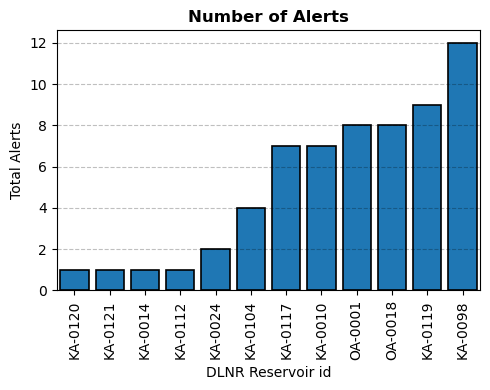

In [18]:
#Create Barplot:
fig, ax = plt.subplots(figsize=(5, 4))

#bars
rects = ax.bar(hazard_only.dlnrid, hazard_only['total_alerts'], edgecolor='black', linewidth=1.2)
plt.xticks(rotation=90, ha='center')
plt.bar

#labels
plt.title('Number of Alerts', fontweight  = 'bold')
ax.set_xlabel('DLNR Reservoir id')
ax.set_ylabel('Total Alerts')

#margins and stuff
ax.margins(x=0.008, y=0.05)
plt.tight_layout()
plt.grid(color='black', which='major', axis='y', linestyle='dashed', alpha = 0.25)
plt.savefig('number_alerts.png')


### Dry seaon vs wet season total alerts (UH SLC ONLY)

In [19]:
dry = 0 #dry season alerts
wet = 0 #wet season alerts

alert_start_tally = [] # alert starting dates
alert_end_tally = []
duration_tally = [] # alert durations
reservoir = []
for file in WL_alerts:
    WL_alerts[file]['event_start'] = pd.to_datetime(WL_alerts[file].event_start)
    WL_alerts[file]['event_end'] = pd.to_datetime(WL_alerts[file].event_end)
    alert_months = WL_alerts[file].event_start.dt.month

    for month in range(len(alert_months)):
        alert_start_tally.append(WL_alerts[file]['event_start'][month])
        alert_end_tally.append(WL_alerts[file]['event_end'][month])
        duration_tally.append(WL_alerts[file]['duration'][month])
        reservoir.append(file)
        if month > 3 and month < 11:
            dry += 1
        else:
            wet += 1
            
            
print('total DRY season alerts: ' + str(dry))
print('total WET season alerts: ' + str(wet))

total DRY season alerts: 26
total WET season alerts: 35


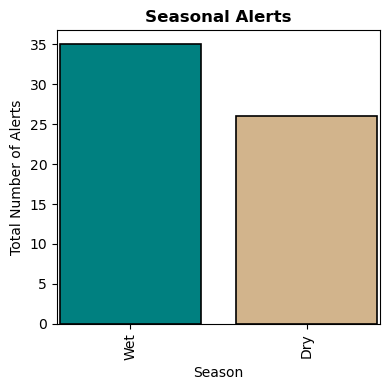

In [20]:
#Create Barplot:
fig, ax = plt.subplots(figsize=(4, 4))

#bars
rects = ax.bar(['Wet', 'Dry'], [wet,dry], color = ['teal', 'tan'], edgecolor='black', linewidth=1.2)
plt.xticks(rotation=90, ha='center')
plt.bar

#labels
plt.title('Seasonal Alerts', fontweight  = 'bold')
ax.set_xlabel('Season')
ax.set_ylabel('Total Number of Alerts')

#margins and stuff
ax.margins(x=0.008, y=0.05)
plt.tight_layout()

plt.savefig('seasonal_alert_tally.png')

# Alert Information Graphs: (duration, timing, location) & (duration, location, season) (UH SLC ONLY)

Collect all of the necessary data into a dataframe for the next few graphs

In [21]:
#ccreate dataframe to hold everything for graphs
alert_durations = pd.DataFrame()

#must do weird python pandas thingss to get the number of days as an integer?
alert_durations['duration'] = duration_tally
alert_durations.duration = alert_durations.duration.dt.days.astype('int16')

#create a column of alert starting time and ending
alert_durations['alert_start'] = alert_start_tally
alert_durations['alert_end'] = alert_end_tally

#create a column of reservoir name that the alert occurred in
alert_durations['reservoir'] = reservoir

#create a column for the state that the alert occurred in
alert_durations['dlnrid'] = np.nan
alert_durations['state'] = np.nan
for i in range(len(alert_durations)):
    file = alert_durations.reservoir[i]
    SLC_id = file #.split('.')[0].split('_')[1] #split the WL_..... file so that the SLC id is the only letters (remove WL_ and remove .csv)
    station_meta_index = np.where(Station_Meta.id == SLC_id)[0][0] #find the row where the SLC id is used to determine start and stop levels
    dlnrid = Station_Meta.dlnrid[station_meta_index] 
    alert_durations['dlnrid'][i] = dlnrid
    if alert_durations['dlnrid'][i].split('-')[0] == 'KA':
        alert_durations['state'][i] = 1
    elif alert_durations['dlnrid'][i].split('-')[0] == 'OA':
        alert_durations['state'][i] = 2
    elif alert_durations['dlnrid'][i].split('-')[0] == 'MA':
        alert_durations['state'][i] = 3
        
#create a column of month that the alert occurred in using the starting date
alert_durations['month']  = alert_durations.alert_start.dt.month


AttributeError: 'DataFrame' object has no attribute 'dlnrid'

In [ ]:
alert_durations

### Graph of Alert Duration, Timing, Location (UH SLC ONLY)

In [ ]:
#plot every alert through spatial timing of the alerts, duration, and location
KA_alerts = alert_durations.loc[alert_durations['state'] == 1.0] #state 
OA_alerts = alert_durations.loc[alert_durations['state'] == 2.0]
MA_alerts = alert_durations.loc[alert_durations['state'] == 3.0]

In [ ]:
#plot every alert through spatial timing of the alerts, duration, and location

#group by state
groups = alert_durations.groupby('state')

fig, ax = plt.subplots(figsize=(8,6))

#color the dots by state and plot as a scatter
for name, group in groups:
    ax.scatter(group["alert_start"], group["duration"], marker="o", linestyle="", label=name, alpha = 0.7, s = 60, edgecolor = 'k')

#labels
ax.set_title('Duration, Date, and Island of Water Level Alerts', fontweight = 'bold')
ax.set_ylabel('Duration of Alert (days)')
ax.set_xlabel('Start Date of Alert')

#x axis lables and what not
ax.xaxis.set_major_locator(matplotlib.dates.YearLocator()) #year locator
ax.xaxis.set_minor_locator(matplotlib.dates.MonthLocator((4,7,10))) #only months apr, jul, oct
ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter("\n%Y")) 
ax.xaxis.set_minor_formatter(matplotlib.dates.DateFormatter("%b"))
plt.gca().set_xbound(pd.to_datetime('01-01-2018'), pd.to_datetime('07-01-2024')) #x axis limit
ax.set_ylim(-1, 65) #y axis limit
plt.setp(ax.get_xticklabels(), rotation=0, ha="center")


#Legend
ax.legend(['Kauai', 'Oahu', 'Maui'])

plt.tight_layout()
plt.savefig('duration_date_island_WLAlerts.png')

## Plot the Alerts Timeline for each reservoir

In [ ]:

fig, ax = plt.subplots(figsize=(12,8))
data_info = data_info.set_index('dlnrid')

#plot the timelines by state...
groups = KA_alerts.groupby(['dlnrid'])
for name, group in groups:
    ax.hlines(y= group['dlnrid'], xmin = group["alert_start"], xmax = group["alert_end"], colors = 'r', lw = 10)
    #plot start and end of data
    dlnrid = group['dlnrid'].reset_index(drop = True)[0]
    ax.hlines(y= dlnrid, xmin = data_info.start_date[dlnrid], xmax = data_info.end_date[dlnrid], alpha = 0.3, linestyle = '--', color = 'blue', lw = 2)
groups = OA_alerts.groupby(['dlnrid'])
for name, group in groups:
    ax.hlines(y= group['dlnrid'], xmin = group["alert_start"], xmax = group["alert_end"], colors = 'r', lw = 10)
        #plot start and end of data
    dlnrid = group['dlnrid'].reset_index(drop = True)[0]
    ax.hlines(y= dlnrid, xmin = data_info.start_date[dlnrid], xmax = data_info.end_date[dlnrid], alpha = 0.3, linestyle = '--', color = 'blue', lw = 2)
groups = MA_alerts.groupby(['dlnrid'])
for name, group in groups:
    ax.hlines(y= group['dlnrid'], xmin = group["alert_start"], xmax = group["alert_end"], colors = 'r', lw = 10)
    #plot start and end of data
    dlnrid = group['dlnrid'].reset_index(drop = True)[0]
    ax.hlines(y= dlnrid, xmin = data_info.start_date[dlnrid], xmax = data_info.end_date[dlnrid], alpha = 0.3, linestyle = '--', color = 'blue', lw = 2)


reservoirs_w_alerts = []    
#get a list of all reservoirs with alerts
reservoirs_w_alerts.append(KA_alerts.dlnrid.unique().tolist())
reservoirs_w_alerts.append(OA_alerts.dlnrid.unique().tolist())
reservoirs_w_alerts.append(MA_alerts.dlnrid.unique().tolist())
reservoirs_w_alerts = list((itertools.chain.from_iterable(reservoirs_w_alerts)))



#plot timeseries of non alerts
result = result.set_index('dlnrid')
for i in result.index:
    if i in reservoirs_w_alerts:
        continue
    else: 
        ax.hlines(y= i, xmin = result.start_date[i], xmax = result.end_date[i], alpha = 0.3, linestyle = '--', color = 'blue', lw = 2)
result = result.reset_index() 


#### plot  the x axis date format stuff
ax.xaxis.set_major_locator(matplotlib.dates.YearLocator())
ax.xaxis.set_minor_locator(matplotlib.dates.MonthLocator((4,7,10)))
ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter("\n%Y"))
ax.xaxis.set_minor_formatter(matplotlib.dates.DateFormatter("%b"))
plt.setp(ax.get_xticklabels(), rotation=0, ha="center", fontsize = 10)
plt.gca().set_xbound(pd.to_datetime('01-01-2018'), pd.to_datetime('07-01-2024')) # Changes x-axis range


#title and axis labels
ax.set_title('Reservoir Data and Alerts Timeline', fontweight = 'bold', fontsize = 19)
ax.set_ylabel('DLNR Reservoir ID', weight = 'bold', fontsize = 14)
ax.set_xlabel('Date', weight = 'bold', fontsize = 14)



#plot the dash lines 
a = plt.grid(alpha = 0.45, linestyle = '--', which =  'both', axis = 'x')
b = plt.grid(alpha = 0.2, linestyle = '--', which =  'both', axis = 'y')
#b = plt.grid(alpha = 0.14, linestyle = '--', color = 'r', axis = 'y', lw = '2')



plt.tight_layout()
plt.savefig('WL_alert_timeline.png')

data_info = data_info.reset_index()

In [ ]:
result

In [ ]:

reservoirs_w_alerts = list((itertools.chain.from_iterable(reservoirs_w_alerts)))


### Graph showing Alert Duration, Location, Season (UH SLC ONLY)

In [ ]:
#plot every alert through spatial timing of the alerts, duration, and location
KA_alerts = alert_durations.loc[alert_durations['state'] == 1.0]
OA_alerts = alert_durations.loc[alert_durations['state'] == 2.0]
MA_alerts = alert_durations.loc[alert_durations['state'] == 3.0]

#plot the points of alerts
fig, ax = plt.subplots(figsize=(8,3))
a = ax.scatter(KA_alerts["month"], KA_alerts["duration"], marker="o", linestyle="", alpha = 0.6, s = 20, edgecolor = 'k')
b = ax.scatter(OA_alerts["month"], OA_alerts["duration"], marker="o", linestyle="", alpha = 0.6, s = 20, edgecolor = 'k')
c = ax.scatter(MA_alerts["month"], MA_alerts["duration"], marker="o", linestyle="", alpha = 0.6, s = 20, edgecolor = 'k')

#labels
ax.set_title('Duration, Month, and Island of Water Level Alerts', fontweight = 'bold')
ax.set_ylim(-1, 65)
ax.set_xlim(0.8, 12.2)
ax.set_ylabel('Duration of Event (days)')
ax.set_xlabel('Month of Event')


ax.fill_between([4,5,6,7,8,9,10], -10, 80, color = 'tan', alpha = 0.3, zorder = 0) #dry season color
ax.fill_between([0,1,2,3,4], -10, 80, color = 'cornflowerblue', alpha = 0.3, zorder = 0) #wet season color
ax.fill_between([10, 11,12, 13], -10, 80, color = 'cornflowerblue', alpha = 0.3, zorder = 0) #wet season color
ax.legend(['Kauai', 'Oahu', 'Maui', 'Dry Season', 'Wet Season'], fontsize = 7, loc= 'upper left') #legend
plt.xticks([*range(1,13)])

plt.tight_layout()


In [ ]:
#plot every alert through spatial timing of the alerts, duration, and location
KA_alerts = alert_durations.loc[alert_durations['state'] == 1.0]
# OA_alerts = alert_durations.loc[alert_durations['state'] == 2.0]
# MA_alerts = alert_durations.loc[alert_durations['state'] == 3.0]

x = KA_alerts.groupby('month')

durations = []
x = x.groups
for key in x:
    durations.append(x[key].tolist())

#plot the points of alerts
fig, ax = plt.subplots(figsize=(8,3))
a = ax.boxplot(durations)
# b = ax.scatter(OA_alerts["month"], OA_alerts["duration"], marker="o", linestyle="", alpha = 0.6, s = 20, edgecolor = 'k')
# c = ax.scatter(MA_alerts["month"], MA_alerts["duration"], marker="o", linestyle="", alpha = 0.6, s = 20, edgecolor = 'k')

#labels
ax.set_title('Duration, Month, and Island of Water Level Alerts', fontweight = 'bold')
ax.set_ylim(-1, 80)
ax.set_xlim(0.7, 12.2)
ax.set_ylabel('Duration of Event (days)')
ax.set_xlabel('Month of Event')


ax.fill_between([4,5,6,7,8,9,10], -10, 100, color = 'tan', alpha = 0.3, zorder = 0) #dry season color
ax.fill_between([0,1,2,3,4], -10, 100, color = 'cornflowerblue', alpha = 0.3, zorder = 0) #wet season color
ax.fill_between([10, 11,12, 13], -10, 100, color = 'cornflowerblue', alpha = 0.3, zorder = 0) #wet season color
#ax.legend(['Kauai', 'Oahu', 'Maui', 'Dry Season', 'Wet Season'], fontsize = 7, loc= 'upper left') #legend
plt.xticks([*range(1,13)])

plt.tight_layout()

In [ ]:
x = KA_alerts.groupby('month')

durations = []
x = x.groups
for key in x:
    durations.append(x[key].tolist())


# Calculate Daily Slope Trends

Calculate the slopes using linear trends. Figure out the linear trend of the slope and the length of the slope in days. The next day must be a reversal for a new slope to be calculated. If the next day is at the same water level, continue calculating the same trend slope. Once the trend is reversed, the first and last point will be used to figure out the linear trend.

In [ ]:
def get_slopes(WL_data, date):
   
    all_slopes = []
    start = []
    end = []
    all_total_n = []
    flexible_range = 0 #flexible range on linear trend. right not set to be = to or greater/less than the previous value

    i = 0
    while i < (len(WL_data) - 1):
        tally = [] #this is for appending WL data that follows a consistent up or down trend

        if WL_data[i] != np.nan:
            if WL_data[i + 1] != np.nan: #if the nxt value is nan forget about it
                #in the case where the water level is going up
                if WL_data[i + 1] >= (WL_data[i] + flexible_range):
                    start.append(daily_dic[key]['date'][i])
                    j = WL_data[i + 1] #next value is trendy
                    starting_WL = WL_data[i] #start of the trend
                    tally.append(starting_WL) #start tallyinhg up the WL data in trend
                    while (j + flexible_range) >= starting_WL:
                        if i <= (len(WL_data) -2): #so that the code doesnt break
                            if WL_data[i + 1] != np.nan: #must not be a nan value
                                j = WL_data[i+1] #next value follows the trend
                                starting_WL = WL_data[i] #shift the start of the trend to the next value
                                tally.append(j) # keep track of the data trend
                                i+=1 # move to the next value in the WL data
                            else:
                                break #get out if the trend breaks
                        else:
                            break #if we are at the end of the data close the loop and ditch it
                    tally.pop() #remove the last one because it is where the trend was broken
                    total_n = len(tally) #total number of data samples in the trend
                    all_total_n.append(total_n) #list of all total samples 

                    slope = (tally[-1] - tally[0]) / total_n #slope calculated by y2 - y1 / x2- x1 where x2 is the length of the samples and x1 starts at 0
                    all_slopes.append(slope) # keep track of all of the slopes
                    end.append(daily_dic[key]['date'][i])
                    continue

                #in the case where the water level is going down
                if WL_data[i + 1] < (WL_data[i] + flexible_range):
                    start.append(daily_dic[key]['date'][i])
                    j = WL_data[i + 1]
                    starting_WL = WL_data[i]
                    tally.append(starting_WL)
                    while (j - flexible_range) <= starting_WL:
                        if i <= (len(WL_data) -2):
                            if WL_data[i + 1] != np.nan:
                                j = WL_data[i+1]
                                starting_WL = WL_data[i]
                                tally.append(j)
                                i+=1
                            else:
                                break
                        else:
                            break
                    tally.pop() #remove the last one because it is where the trend was broken
                    total_n = len(tally)
                    all_total_n.append(total_n)
                    slope = (tally[-1] - tally[0]) / total_n
                    all_slopes.append(slope)
                    end.append(daily_dic[key]['date'][i])
                    continue
                    
                
                i +=1
            else:
                i +=1
        else:
            i += 1

    #create a dataframe of everything    
    slopes_df = pd.DataFrame()
    slopes_df['n_data'] = all_total_n
    slopes_df['avg_WL_change_per_n'] = all_slopes
    #-1 or 1 for the direction of the slopes
    slopes_df['neg_pos'] = np.nan
    slopes_df['start'] = start
    slopes_df['end'] = end
    for i in range(len(slopes_df)):
        if slopes_df['avg_WL_change_per_n'][i] > 0:
            slopes_df['neg_pos'][i] = 1
        if slopes_df['avg_WL_change_per_n'][i] < 0:
            slopes_df['neg_pos'][i] = -1

    return slopes_df

In [ ]:
#use the function above to get all of the slopes for each reservoir water level data
Reservoir_Slopes = {}
for key in daily_dic:
    Reservoir_Slopes[key] = get_slopes(daily_dic[key]['data'], daily_dic[key]['date'])
    print(key)

## Visualizing the slope data as regular and as 

In [ ]:
#remove outlier slopes from bad/suspicious data:
for key in Reservoir_Slopes:
    if key in ['EDD0411E', 'EDD05268', 'EDD0BF48', 'EDD06920', 'EDD08400']: #chosen based on suspicious looking water level graphs
        data = Reservoir_Slopes[key]
        STDs = 3 #three standard deviations
        no_outliers = data[((data[['avg_WL_change_per_n']] - data[['avg_WL_change_per_n']].mean()) / data[['avg_WL_change_per_n']].std()).abs() < STDs]
        Reservoir_Slopes[key]['avg_WL_change_per_n'] = no_outliers['avg_WL_change_per_n']

In [ ]:
#plot the slope points using the average linear trend and the length of the trend recorded
#color the titles based on the hdyrologic response rating determined using the alert levels
colors={'hazard' : 'red', 'problem' : 'orange', 'safe' : 'green', 'unknown' : 'black'} 

for key in Reservoir_Slopes:
    print(key)
    h_response = hydrologic_response[key]
    c = colors[h_response]
    
    fig, ax = plt.subplots(figsize=(8,3))
    
    #plot scatter
    ax.scatter(Reservoir_Slopes[key]['n_data'], Reservoir_Slopes[key]['avg_WL_change_per_n'], s= 15, alpha = 0.65)
    
    if key != 'EDD01162' and key != 'EDD11398': #these reservoirs don't have enough data for means
        #determine mean positive and mean negative trends
        avgUPtrend = Reservoir_Slopes[key].groupby(['neg_pos'])['avg_WL_change_per_n'].mean().tolist()[1]
        avgDOWNtrend = Reservoir_Slopes[key].groupby(['neg_pos'])['avg_WL_change_per_n'].mean().tolist()[0]
        #plot the trends as horizontal line
        plt.axhline(y = avgUPtrend, color = 'g', linestyle = '-')
        plt.axhline(y = avgDOWNtrend, color = 'r', linestyle = '-')
        
    #labels
    ax.set_title(key, color = c, fontweight = 'bold')
    ax.set_xlabel('Length of Trend (days)')
    ax.set_ylabel('Avg Change in WL During Trend')
    
    #grid to make it look nicer
    a = plt.grid(alpha = 0.4, linestyle = '--', which =  'both')
    plt.tight_layout()

NORMALIZE THE SLOPES:
normalize the change in WL trends by the hydraulic height. Change it to percentages... How much does the WL change relative to the maximum hydraulic height. It will be normalized to percentages: If the hydraulic height is 10 ft and the trend is +1ft/day, then the % change is 10%

In [ ]:
#normalize the slope trend data using the hydraulic heights
hydr_height = pd.read_csv(os.path.join("..", "Data/Basin_dam_website_data", '071723ForKoa_ResCordsData_editted2.csv'))
for key in Reservoir_Slopes:
    res_id = key.replace('WL_', '').replace('.csv', '') #get the Id without the file name .csv
    if res_id in hydr_height.RES_ID.tolist():
        reservoir_index = hydr_height.index[hydr_height['RES_ID']==res_id].tolist()[0]
        hydraulic_height_val = hydr_height['Hydraulic_Height-ft'][reservoir_index]
        Reservoir_Slopes[key]['normalized_change_WL'] = ( Reservoir_Slopes[key]['avg_WL_change_per_n'] / hydraulic_height_val ) * 100
    else: 
        Reservoir_Slopes[key]['normalized_change_WL'] = np.nan

#plot the normalized datas
colors={'hazard' : 'red', 'problem' : 'orange', 'safe' : 'green', 'unknown' : 'gray'}
for key in Reservoir_Slopes:
    print(key)
    h_response = hydrologic_response[key]
    c = colors[h_response]
    
    fig, ax = plt.subplots(figsize=(8,3))
    ax.scatter(Reservoir_Slopes[key]['n_data'], Reservoir_Slopes[key]['normalized_change_WL'], s= 15, alpha = 0.65)
    
    if key != 'EDD01162.csv' and key != 'EDD11398.csv':
        avgUPtrend = Reservoir_Slopes[key].groupby(['neg_pos'])['normalized_change_WL'].mean().tolist()[1]
        avgDOWNtrend = Reservoir_Slopes[key].groupby(['neg_pos'])['normalized_change_WL'].mean().tolist()[0]
    
        plt.axhline(y = avgUPtrend, color = 'g', linestyle = '-')
        plt.axhline(y = avgDOWNtrend, color = 'r', linestyle = '-')
    ax.set_title(key, color = c, fontweight = 'bold')
    ax.set_xlabel('Length of Trend (days)')
    ax.set_ylabel('% change in WL of the reservoir')
    
    
    a = plt.grid(alpha = 0.4, linestyle = '--', which =  'both')
    plt.tight_layout()

# Classify the Reservoirs using the Slope data

Get the categorization data using the top 5 maximum trends. Get the average up and down trneds. Then use the average up and down trend to figure out which way the WL slopes are skewed (positive or negative). To compare each reservoir to eachother, the data must be normalized again. The difference between the up and down trend is then normalized by the range of the up and down trend so that it is turned to percentages. This is important because if a reservoir has a 0.1 higher average up trend, this number is meaningless, but once normalized, it could mean that this reservoir has a 40% higher up trend compared to its down trend.

In [ ]:
slope_categorization = pd.DataFrame( columns = ['Reservoir', 'avg_max_inc_%WLchange' , 'avg_max_dec_%WLchange', 'mean_trend_weight_norm%', 'start_dates', 'end_dates'], index =[*range(0, len(Reservoir_Slopes))] )

i = 0
for key in Reservoir_Slopes:
    if len(Reservoir_Slopes[key]) > 1 and np.isnan(Reservoir_Slopes[key].normalized_change_WL.mean()) == False: 
        #get the average % WL from the top 5 positive trends #get the average % WL from the top 5 negative trends
        avg_max_negative_slope = Reservoir_Slopes[key].sort_values(by = 'normalized_change_WL')['normalized_change_WL'][0:5].mean()
        avg_max_positive_slope = Reservoir_Slopes[key].sort_values(by = 'normalized_change_WL', ascending = False)['normalized_change_WL'][0:5].mean()
        top5_startdates = Reservoir_Slopes[key].sort_values(by = 'normalized_change_WL')['start'][0:5]
        top5_enddates = Reservoir_Slopes[key].sort_values(by = 'normalized_change_WL')['end'][0:5]
        
        #average slope trends
        avgUPtrend = Reservoir_Slopes[key].groupby(['neg_pos'])['normalized_change_WL'].mean().tolist()[1]
        avgDOWNtrend = Reservoir_Slopes[key].groupby(['neg_pos'])['normalized_change_WL'].mean().tolist()[0]

        #get the difference between the mean positive trend and the mean negative trend and normalize it
        mean_trend_weight = avgUPtrend - abs(avgDOWNtrend)
        mean_trend_weight_normalized = (mean_trend_weight / (avgUPtrend + abs(avgDOWNtrend))) * 100
        slope_categorization['start_dates'][i] = top5_startdates
        slope_categorization['end_dates'][i] = top5_enddates
        slope_categorization['Reservoir'][i] = key
        slope_categorization['avg_max_inc_%WLchange'][i] = avg_max_positive_slope
        slope_categorization['avg_max_dec_%WLchange'][i] = avg_max_negative_slope
        slope_categorization['mean_trend_weight_norm%'][i] = mean_trend_weight_normalized

    else: 
        slope_categorization['start_dates'][i] = top5_startdates
        slope_categorization['end_dates'][i] = top5_enddates
        slope_categorization['Reservoir'][i] = key
        slope_categorization['avg_max_inc_%WLchange'][i] = np.nan
        slope_categorization['avg_max_dec_%WLchange'][i] = np.nan
        slope_categorization['mean_trend_weight_norm%'][i] = np.nan
    i+=1

    
#get the dlnrid
dlnrid= []
Station_Meta = Station_Meta.set_index('id')

for ID in slope_categorization.Reservoir:
    dlnrid.append(Station_Meta.dlnrid[ID])

slope_categorization['dlnrid'] = dlnrid
Station_Meta = Station_Meta.reset_index()

#get the hydrologic response from 
hydr_resp = []
for ID in slope_categorization.Reservoir:
    hydr_resp.append(hydrologic_response[ID])

slope_categorization['hydrologic_response'] = hydr_resp

In [ ]:
slope_categorization

In [ ]:
slope_categorization.to_csv('slope_categorization.csv')

In [ ]:
slope_categorization = slope_categorization.reset_index()
slope_categorization = slope_categorization.set_index('dlnrid')
fig, ax = plt.subplots(figsize=(8,7))
data_info = data_info.reset_index()
data_info = data_info.set_index('dlnrid')

for i in data_info.index:
    dlnrid = i
    st = slope_categorization.start_dates[dlnrid].tolist()
    en = slope_categorization.end_dates[dlnrid].tolist()
    ax.hlines(y= dlnrid, xmin = data_info.start_date[dlnrid], xmax = data_info.end_date[dlnrid], alpha = 0.2, linestyle = '--', color = 'blue', lw = 2)
    ax.hlines(y= dlnrid, xmin = st[0], xmax = en[0], colors = 'darkred', lw = 10) 
    ax.hlines(y= dlnrid, xmin = st[1], xmax = en[1], colors = 'darkred', lw = 10) 
    ax.hlines(y= dlnrid, xmin = st[2], xmax = en[2], colors = 'darkred', lw = 10) 
    ax.hlines(y= dlnrid, xmin = st[3], xmax = en[3], colors = 'darkred', lw = 10) 
    ax.hlines(y= dlnrid, xmin = st[4], xmax = en[4], colors = 'darkred', lw = 10) 
    

#title and axis labels
ax.set_title('Top 5 Events with the Highest Water Level Increases', fontweight = 'bold', fontsize = 15)
ax.set_ylabel('DLNR Reservoir ID', weight = 'bold', fontsize = 14)
ax.set_xlabel('Date', weight = 'bold', fontsize = 14)



#plot the dash lines 
a = plt.grid(alpha = 0.25, linestyle = '--', which =  'both', axis = 'x')
b = plt.grid(alpha = 0.7, linestyle = '--', which =  'both', axis = 'y')
#b = plt.grid(alpha = 0.14, linestyle = '--', color = 'r', axis = 'y', lw = '2')

slope_categorization = slope_categorization.reset_index()
data_info = data_info.reset_index()

# Seasonal Differences in WL Increases

In [ ]:
data_info = data_info.reset_index()
slope_categorization = slope_categorization.reset_index()
slope_categorization = slope_categorization.set_index('dlnrid')
data_info = data_info.set_index('dlnrid')

all_starts = []
all_ends = []
all_seasons = []
all_dlnrid = []

for i in data_info.index:
    dlnrid = i
    st = slope_categorization.start_dates[dlnrid].tolist()
    en = slope_categorization.end_dates[dlnrid].tolist()

    months = []
    for i in st:
        if i.month >= 11:
            month = 'rainy'
        elif i.month < 4:
            month = 'rainy'
        else:
            month = 'dry'
        months.append(month)
   
    all_starts.append(st)
    all_seasons.append(months)
    all_ends.append(en)
    all_dlnrid.append(dlnrid)


In [ ]:
dict1 = {'start' : all_starts, 'end': all_ends, 'seasons' : all_seasons, 'dlnrid' : all_dlnrid}
df = pd.DataFrame(dict1)

In [ ]:
rainy = 0
dry = 0 


for i in df.index:
    for x in df.seasons[i]:
        if x == 'rainy':
            rainy+= 1
        if x == 'dry':
            dry += 1

In [ ]:
#Create Barplot:
fig, ax = plt.subplots(figsize=(4, 4))

#bars
rects = ax.bar(['Wet', 'Dry'], [rainy, dry], color = ['teal', 'tan'], edgecolor='black', linewidth=1.2)
plt.xticks(rotation=90, ha='center')
plt.bar

#labels
plt.title('Seasonal Variations of \n INcreasing Water Level Events', fontweight  = 'bold')
ax.set_xlabel('Season')
ax.set_ylabel('Total Number of Events')

#margins and stuff
ax.margins(x=0.008, y=0.05)
plt.tight_layout()

plt.savefig('seasonal_alert_tally.png')

In [ ]:
slope_categorization

# Alert Timeline

In [ ]:
data_info = data_info.reset_index()
slope_categorization = slope_categorization.reset_index()
fig, ax = plt.subplots(figsize=(12,8))
slope_categorization = slope_categorization.set_index('dlnrid')
data_info = data_info.set_index('dlnrid')

#plot the timelines by state...
groups = KA_alerts.groupby(['dlnrid'])
for name, group in groups:
    ax.hlines(y= group['dlnrid'], xmin = group["alert_start"], xmax = group["alert_end"], colors = 'r', lw = 10)
    #plot start and end of data
    dlnrid = group['dlnrid'].reset_index(drop = True)[0]
    ax.hlines(y= dlnrid, xmin = data_info.start_date[dlnrid], xmax = data_info.end_date[dlnrid], alpha = 0.3, linestyle = '--', color = 'blue', lw = 2)
groups = OA_alerts.groupby(['dlnrid'])
for name, group in groups:
    ax.hlines(y= group['dlnrid'], xmin = group["alert_start"], xmax = group["alert_end"], colors = 'r', lw = 10)
        #plot start and end of data
    dlnrid = group['dlnrid'].reset_index(drop = True)[0]
    ax.hlines(y= dlnrid, xmin = data_info.start_date[dlnrid], xmax = data_info.end_date[dlnrid], alpha = 0.3, linestyle = '--', color = 'blue', lw = 2)
groups = MA_alerts.groupby(['dlnrid'])
for name, group in groups:
    ax.hlines(y= group['dlnrid'], xmin = group["alert_start"], xmax = group["alert_end"], colors = 'r', lw = 10)
    #plot start and end of data
    dlnrid = group['dlnrid'].reset_index(drop = True)[0]
    ax.hlines(y= dlnrid, xmin = data_info.start_date[dlnrid], xmax = data_info.end_date[dlnrid], alpha = 0.3, linestyle = '--', color = 'blue', lw = 2)


reservoirs_w_alerts = []    
#get a list of all reservoirs with alerts
reservoirs_w_alerts.append(KA_alerts.dlnrid.unique().tolist())
reservoirs_w_alerts.append(OA_alerts.dlnrid.unique().tolist())
reservoirs_w_alerts.append(MA_alerts.dlnrid.unique().tolist())
reservoirs_w_alerts = list((itertools.chain.from_iterable(reservoirs_w_alerts)))



#plot timeseries of non alerts
result = result.set_index('dlnrid')
for i in result.index:
    if i in reservoirs_w_alerts:
        continue
    else: 
        ax.hlines(y= i, xmin = result.start_date[i], xmax = result.end_date[i], alpha = 0.3, linestyle = '--', color = 'blue', lw = 2)
result = result.reset_index() 


#### plot  the x axis date format stuff
ax.xaxis.set_major_locator(matplotlib.dates.YearLocator())
ax.xaxis.set_minor_locator(matplotlib.dates.MonthLocator((4,7,10)))
ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter("\n%Y"))
ax.xaxis.set_minor_formatter(matplotlib.dates.DateFormatter("%b"))
plt.setp(ax.get_xticklabels(), rotation=0, ha="center", fontsize = 10)
plt.gca().set_xbound(pd.to_datetime('01-01-2018'), pd.to_datetime('07-01-2024')) # Changes x-axis range


#title and axis labels
ax.set_title('Reservoir Data and Alerts Timeline', fontweight = 'bold', fontsize = 19)
ax.set_ylabel('DLNR Reservoir ID', weight = 'bold', fontsize = 14)
ax.set_xlabel('Date', weight = 'bold', fontsize = 14)



#plot the dash lines 
a = plt.grid(alpha = 0.45, linestyle = '--', which =  'both', axis = 'x')
b = plt.grid(alpha = 0.2, linestyle = '--', which =  'both', axis = 'y')
#b = plt.grid(alpha = 0.14, linestyle = '--', color = 'r', axis = 'y', lw = '2')



plt.tight_layout()
plt.savefig('WL_alert_timeline.png')

data_info = data_info.reset_index()

Quantify the balance of the reservoir system: if the up trend is more than 5% higher than the down trend, then this reservoir tends to have higher inflows compared to its outflows on average.

Quantify the risk of WL increas: if the maximum WL increase trend is greater than 2% of the total hydraulic height per day, then this is risky cuz the reservoir could fill up very fast and overturn.

In [ ]:
#quantify the balance of the reservoir system
slope_categorization['operational_stability'] = np.nan
for i in range(len(slope_categorization)):
    if slope_categorization['mean_trend_weight_norm%'][i] < 5:
        slope_categorization['operational_stability'][i] = 'NEUTRAL'
    else: 
        slope_categorization['operational_stability'][i] = 'SKEWED'
    if np.isnan(slope_categorization['mean_trend_weight_norm%'][i]) == True:
        slope_categorization['operational_stability'][i] = np.nan
        
#quantify the risk of WL increase
slope_categorization['WL_pos_change_potential'] = np.nan
for i in range(len(slope_categorization)):
    if slope_categorization['avg_max_inc_%WLchange'][i] > 2:
        slope_categorization['WL_pos_change_potential'][i] = 'HIGH'
    else: 
        slope_categorization['WL_pos_change_potential'][i] = 'LOW'
    if np.isnan(slope_categorization['avg_max_inc_%WLchange'][i]) == True:
        slope_categorization['WL_pos_change_potential'][i] = np.nan

In [ ]:
slope_categorization = slope_categorization.sort_values(by =['avg_max_inc_%WLchange'] )

In [ ]:
#Create Barplot:
fig, ax = plt.subplots(figsize=(10, 4))

#bars
rects = ax.bar(slope_categorization.dlnrid, slope_categorization['avg_max_inc_%WLchange'], edgecolor='black', linewidth=1.2)
plt.xticks(rotation=90, ha='center')
plt.bar

#labels
plt.title('Average Daily Percent Change in Water Level heights (relative to hydraulic height) \n from the 5 Highest Increasing Trends ', fontweight  = 'bold')
ax.set_xlabel('DLNR Reservoir id')
ax.set_ylabel('Daily Increase in Water Level (%)')
plt.axhline(y = 3, color = 'r', linestyle = '-')

#margins and stuff
ax.margins(x=0.008, y=0.05)
plt.tight_layout()
plt.grid(color='black', which='major', axis='y', linestyle='dashed', alpha = 0.25)
plt.savefig('trends.png')

In [ ]:
slope_categorization['hydr_resp_SLOPE_safety_rating'] = np.nan
for i in range(len(slope_categorization)):
    
    #if the operations are nuetral and the WL change i low, the reservoir is level 1 safe
    if slope_categorization['operational_stability'][i] == 'NEUTRAL' and slope_categorization['WL_pos_change_potential'][i] == 'LOW' :
        slope_categorization['hydr_resp_SLOPE_safety_rating'][i] = 1
        
    #if the operations are skewed and the WL change is low, the reservoir is level 2 problematic
    elif slope_categorization['operational_stability'][i] == 'SKEWED' and slope_categorization['WL_pos_change_potential'][i] == 'LOW' :
        slope_categorization['hydr_resp_SLOPE_safety_rating'][i] = 2
    
    #if the operations are nuetral and the WL change is high, the reservoir is level 3 problematic
    elif slope_categorization['operational_stability'][i] == 'NEUTRAL' and slope_categorization['WL_pos_change_potential'][i] == 'HIGH' :
        slope_categorization['hydr_resp_SLOPE_safety_rating'][i] = 3
        
    #if the operations are skewed and the WL change is high, the reservoir is level 4 hazardous
    elif slope_categorization['operational_stability'][i] == 'SKEWED' and slope_categorization['WL_pos_change_potential'][i] == 'HIGH' :
        slope_categorization['hydr_resp_SLOPE_safety_rating'][i] = 4
        
        
    if np.isnan(slope_categorization['avg_max_inc_%WLchange'][i]) == True:
        slope_categorization['hydr_resp_SLOPE_safety_rating'][i] = np.nan

In [ ]:
#compare the ratings to the original ratings....
slope_categorization['Original_Hydrologic_response_rating'] = np.nan

for key in hydrologic_response:
    index = slope_categorization.index[slope_categorization['Reservoir']==key].tolist()[0]
    slope_categorization['Original_Hydrologic_response_rating'][index] = hydrologic_response[key]
    
#slope_categorization.to_csv('')

x = slope_categorization.groupby('hydr_resp_SLOPE_safety_rating')
Reservoir_Slopes

### Combine all of the categorized trends for ratings 1-4 and make a plot to visualize the differences between the 4 categorizations

In [ ]:
safe = x.get_group(1)['Reservoir'].tolist()
fig, ax = plt.subplots(4, figsize=(8,15))
Descriptions = ['Balanced trends, Low positive trends', 'Imbalanced trends, Low positive trends', 'Balanced trends, High positive trends', 'Imbalanced trends, High positive trends']
for i in range(1,5):
    hazard_rating = i
    reservoir_list = x.get_group(i)['Reservoir'].tolist()
    for res in reservoir_list:
        ax[i-1].scatter(Reservoir_Slopes[res].n_data, Reservoir_Slopes[res].normalized_change_WL, s=2, c = 'b')
        ax[i-1].set_title('\n'+'Hazard Rating : ' + str(i) +'\n' + Descriptions[i-1], fontweight = 'bold')
        ax[i-1].set_xlabel('Length of Trend (days)', fontsize = 7)
        ax[i-1].set_ylabel('% change in WL', fontsize = 7)
        ax[i-1].set_xlim(0, 40)
        ax[i-1].axhline(0, zorder = 0, linestyle = '--', c = 'red', alpha = 0.1)
        
plt.tight_layout()

# Pull out the top 5 WL trend increases

In [ ]:
import statistics

Reservoir_Slopes
ids = []
Max_WL_trend = []
Max_WL_increase = []

for key in Reservoir_Slopes:
    ids.append(key)
    df= Reservoir_Slopes[key]
    df = df.drop('normalized_change_WL', axis=1)
    df = df.dropna(subset=['avg_WL_change_per_n']) 
    df['total_change'] = df['n_data'] * df['avg_WL_change_per_n']
    max_increase = statistics.mean(df.sort_values('total_change')[-6:-1]['total_change'].tolist())
    
    top5_WL_daily_trend = df.sort_values('avg_WL_change_per_n')[-6:-1]['avg_WL_change_per_n'].tolist()
    num_days_trend = df.sort_values('avg_WL_change_per_n')[-6:-1]['n_data'].tolist()
#     total_WL_increase = []
#     for i in range(len(top5_WL_daily_trend)):
#         total_WL_increase.append(top5_WL_daily_trend[i] * num_days_trend[i])
    Max_WL_trend.append(top5_WL_daily_trend)
    Max_WL_increase.append(max_increase)

In [ ]:
df= Reservoir_Slopes[key]
df = df.drop('normalized_change_WL', axis=1)
df = df.dropna(subset=['avg_WL_change_per_n']) 
df.sort_values('avg_WL_change_per_n')[-6:-1]['avg_WL_change_per_n']

In [ ]:
Max_WL_increase

dict = {'dlnrid': ids, 'max_WL_increase': Max_WL_increase} 
   
df = pd.DataFrame(dict)

In [ ]:
dict = {'dlnrid': ids, 'top5_maxWL': Max_WL_trend} 
top5 = pd.DataFrame(dict)

In [ ]:
df

#get the dlnrid
dlnrid= []
Station_Meta = Station_Meta.set_index('id')

for ID in slope_categorization.Reservoir:
    dlnrid.append(Station_Meta.dlnrid[ID])

df['dlnrid'] = dlnrid
Station_Meta = Station_Meta.reset_index()

#get the hydrologic response from 
hydr_resp = []
for ID in slope_categorization.Reservoir:
    hydr_resp.append(hydrologic_response[ID])

df['hydrologic_response'] = hydr_resp

In [ ]:
df.to_csv('max_WL_increase_percent.csv')

# Difference Between Mean and Alert Level ON

In [ ]:
Station_Meta = Station_Meta.set_index('dlnrid')
stats_df = stats_df.set_index('dlrnid')
dlnrids = []
alert_mean_dif = [] 
for i in stats_df.index:

    dlnrids.append(i)
    
    mean = stats_df['mean'][i]
    alert = Station_Meta.level_alert_on[i]
    difference = abs(alert - mean)
    
    alert_mean_dif.append(difference)
    
d = {'dlrnid': dlnrids, 'alert_mean_difference': alert_mean_dif}
alert_mean_diff_df = pd.DataFrame(data=d)
alert_mean_diff_df = alert_mean_diff_df.sort_values(by = ['alert_mean_difference']) 
alert_mean_diff_df = alert_mean_diff_df.dropna(how='any')

Station_Meta = Station_Meta.reset_index('dlnrid')
stats_df = stats_df.reset_index('dlrnid')

stats_df

In [ ]:
data_info = result

#Create Barplot:
fig, ax = plt.subplots(figsize=(9, 4.5))


#bar graphs
rects = ax.bar(alert_mean_diff_df.dlrnid, alert_mean_diff_df.alert_mean_difference, edgecolor='black', linewidth=1.2)
plt.xticks(rotation=90, ha='center')
plt.yticks(np.arange(0, 300, 25))



#the one year line
#a = ax.axhline(y = 1, color = 'r', linestyle = '-') 

#labels and margins
plt.title('Water Level (ft) Difference Between Mean and Alert Level ON', fontweight  = 'bold')
ax.set_xlabel('DLNR Reservoir id')
ax.set_ylabel('Alert ON and Mean Difference (ft)')


ax.margins(x=0.008, y=0.05)
plt.tight_layout()
plt.grid(color='black', which='major', axis='y', linestyle='dashed', alpha = 0.25)

plt.savefig('alert_mean_diff.png')

# Seasonal Stats¶

In [ ]:
#SAMPLE CODE


# for file in WL_alerts:
#     WL_alerts[file]['event_start'] = pd.to_datetime(WL_alerts[file].event_start)
#     WL_alerts[file]['event_end'] = pd.to_datetime(WL_alerts[file].event_end)
#     alert_months = WL_alerts[file].event_start.dt.month

#     for month in range(len(alert_months)):
#         alert_start_tally.append(WL_alerts[file]['event_start'][month])
#         alert_end_tally.append(WL_alerts[file]['event_end'][month])
#         duration_tally.append(WL_alerts[file]['duration'][month])
#         reservoir.append(file)
#         if month > 3 and month < 11:
#             dry += 1
#         else:
#             wet += 1

In [ ]:
#create a new dictionary for holding month column
seasonal_daily_dic = daily_dic


for key in seasonal_daily_dic:
    seasonal_daily_dic[key] = seasonal_daily_dic[key].reset_index()
    seasonal_daily_dic[key]['month'] = np.nan
    for i in range(len(seasonal_daily_dic[key])):
        month = seasonal_daily_dic[key].date[i].month
        seasonal_daily_dic[key]['month'][i] = month  

In [ ]:
seasonal_id = [] 
wet_mean = []
dry_mean = []
annual = []
stdev = []


for key in seasonal_daily_dic: 
    seasonal_id.append(key)
    
    df = seasonal_daily_dic[key]

    df['season'] = np.nan
    for i in range(len(df)):
        if df.month[i] >= 11 : 
            df.season[i] = 'wet'
        elif df.month[i] <= 4 : 
            df.season[i] = 'wet' 
        else: 
            df.season[i] = 'dry' 


    annual.append(df.data.mean())
    stdev.append(df.data.std())
    dry = df.loc[(df['season'] == 'dry')]
    dry_mean.append(dry.data.mean())

    wet = df.loc[(df['season'] == 'wet')]
    wet_mean.append(wet.data.mean())
    
# dictionary of lists 
seasonal_stats = pd.DataFrame({'UHSLC_USGS_id': seasonal_id, 'dry_mean': dry_mean, 'wet_mean': wet_mean , 'annual' : annual, 'stdev' : stdev} )
   
#other stats
seasonal_stats['seasonal_diff_in_std'] = (seasonal_stats['wet_mean'] - seasonal_stats['dry_mean']) / seasonal_stats['stdev']
seasonal_stats['wet_season_difference'] = seasonal_stats['wet_mean'] - seasonal_stats['annual']
seasonal_stats['dry_season_difference'] = seasonal_stats['dry_mean'] - seasonal_stats['annual']

In [ ]:
#get dlnrid 
seasonal_stats = seasonal_stats.set_index('UHSLC_USGS_id')
seasonal_stats['dlnrid'] = np.nan
Station_Meta = Station_Meta.set_index('id')
for i in Station_Meta.index: 
    dlnrid = Station_Meta['dlnrid'][i]
    seasonal_stats['dlnrid'][i] = dlnrid
    
seasonal_stats = seasonal_stats.reset_index()
Station_Meta = Station_Meta.reset_index()

In [ ]:
seasonal_stats.to_csv('seasonal_stats.csv')
seasonal_stats

In [ ]:
seasonal_stats = seasonal_stats.sort_values('seasonal_diff_in_std')

# #Create Barplot:
fig, ax = plt.subplots(figsize=(9, 4.5))




#bar graphs
rects = ax.bar(seasonal_stats.dlnrid, seasonal_stats.seasonal_diff_in_std, edgecolor='black', linewidth=1.2)
plt.xticks(rotation=90, ha='center')
plt.yticks(np.arange(-1.5, 2, 0.5))


#labels and margins
plt.title('Variation in Seasonal Average Water Level \n Compared to the Annual Average and Standard Deviation', fontweight  = 'bold')
ax.set_xlabel('DLNR Reservoir id')
ax.set_ylabel('Number of Standard Deviations \nthe Seasonal Water Level Average \n Differs from the Annual Average')

ax.set_ylim([-1.5, 1.5])
ax.margins(x=0.008, y=0.05)

plt.tight_layout()
ax.grid(color='black', which='major', axis='y', linestyle='dashed', alpha = 0.25, zorder = 0)
ax.grid(alpha = 1, linestyle = '--', which =  'both', axis = 'x', zorder = 0)
ax.grid(alpha = 0.1, linestyle = '--', which =  'both', axis = 'y', zorder = 0)


ax.set_axisbelow(True)


plt.savefig('seasonal_variation.png')

# RAINDATA
using statewide data download from HCDP, its actually a total pain. The data formattng is strange, and station metadata is inconsistent. Oh well...

In [ ]:
#Concat rain data 

Datadic = {}
metadata_dic = {}


raindatapath = "Data/External_data/Precip/2018-2022_station_data"

for year in os.listdir(os.path.join("..", raindatapath)):
    for month in os.listdir(os.path.join("..", raindatapath, year)):
        file = os.listdir(os.path.join("..", raindatapath, year, month))
        
        # Process into a better format where columns are individual stations and y axis is date
        data = pd.read_csv(os.path.join("..", raindatapath, year, month, file[0]))
        
        # Extract a separaate dataframe of metadata 
        data_metaonly = data[['SKN', 'Station.Name', 'Observer', 'Network', 'Island', 'ELEV.m.',
       'LAT', 'LON', 'NCEI.id', 'NWS.id', 'NESDIS.id', 'SCAN.id', 'SMART_NODE_RF.id']]
        metadata_dic[file[0]]  = data_metaonly
        
        
        data.drop([ 'Station.Name', 'Observer', 'Network', 'Island', 'ELEV.m.',
               'LAT', 'LON', 'NCEI.id', 'NWS.id', 'NESDIS.id', 'SCAN.id',
               'SMART_NODE_RF.id'], axis=1, inplace=True)

        data = data.set_index("SKN", drop=True)
        data = data.transpose()

        data = data.reset_index()
        data['index'] = data['index'].astype(str)

        data['index'] = data['index'].apply(lambda x: x[1:])  # Pull out the X
        data['index'] = pd.to_datetime(data['index'], yearfirst=True)  # .dt.strftime("%Y-%m-%d")
        data.set_index("index", inplace=True)
        data.columns.name = None   # drop the wierd double axis label 
        
        Datadic[file[0]]  = data 
        
# Produce the rainfall dataframe 
RainData = pd.concat(Datadic.values(), sort=True)  
# Produce the metadataframe 
RainData_Meta = pd.concat(metadata_dic.values(), sort=True) 

# SO herees a problem, NO field in the metadata is unique, meaning there is some f-up in the station IDentifiers.  Creating a *hoprefully* unique ID with a couple fields
RainData_Meta['UID'] = RainData_Meta['LAT'].map('{:.6f}'.format).astype(str)+"_"+RainData_Meta['LON'].map('{:.6f}'.format).astype(str)
RainData_Meta.drop_duplicates(subset='UID', inplace=True)     # Hoping to limit to to non-duplicate stations    

# genearate near table outside in Arc 
RainData_Meta["SKN"] = RainData_Meta["SKN"].astype(str)+"_R"   # First make Arc read it as a string 
RainData_Meta.to_csv('RainData_Meta_v2.csv')
# NOW Open in Arc and do a "Point Distance" to generate a near table for each of the reservoirs and each rain location point
# Then need to filter pertinant fields and so a table join based on the table FIDs
RainData_Meta.head()

In [ ]:
# Find the nearest rainfall stations to each of the gauges

n = 5   # The number of rain stations to use
near_table = pd.read_csv(os.path.join("..", "Data/External_data/Precip/2018-2022_station_data_GIS/Reservoirs_Precip_Near_table_V2.csv"))

neartable_N = pd.DataFrame(columns=near_table.columns)

for i in near_table['id'].unique():
    temptable = near_table[near_table['id'] == i]  # For each of the reservoits
    
    temptable = temptable.sort_values('DISTANCE')  # find the closest stations
    temptable = temptable.iloc[0:n]             # select only the n closest stations 
    neartable_N = neartable_N.append(temptable)               # Create dataframe of only the n closest stations 
    
neartable_N.head()

# Create plots of reservoir level and rainfall 

In [ ]:

smalldic = {key: daily_dic[key] for key in ['EDD00214', 'EDD00CC6', 'EDD01FB0', 'EDD024F8']}   # For testing 

for i in daily_dic.keys():  #daily_dic.keys(): 
    print(i)

    stat_id = i[3:-4]
    isla = Station_Meta['dlnrid'][Station_Meta['id'] == stat_id].values[0].split('-')[0]
    
    fig, ax = plt.subplots(figsize=(8,3))
    daily_dic[i].plot(y='data', ax=ax, marker=".", color='k', alpha=0.5, label="WL_(ft)")
    
    # Add the lever alert lines
    Level_alert_on = Station_Meta['level_alert_on'][Station_Meta['id'] == stat_id].values[0]
    plt.axhline(y=Level_alert_on, color='r', linestyle='-', alpha = 0.5)   
    Level_alert_off = Station_Meta['level_alert_off'][Station_Meta['id'] == stat_id].values[0]
    plt.axhline(y=Level_alert_off, color='g', linestyle='-', alpha = 0.5)
    
    
    # Add rainfall 
    
    # Create average rainfall from nearest N stations 
    ax2=ax.twinx()
    nearest_SKN_table = neartable_N[neartable_N['id'] == stat_id]     # Reference the nearest SKN stations for rainfall 
    # list nearest 5 skns
    nearest5skns = list(nearest_SKN_table['SKN'])                      # Pull out the SKN vales from the dataframe 
    nearest5skns = list(map(lambda x: x.split("_")[0], nearest5skns))  # Quick list function map to pull of the "_R" from each SKN
    nearest5skns = list(map(lambda x: float(x), nearest5skns))  # Quick list function map to turn values back into floats
    rain_datatoplot_5 = RainData[nearest5skns]     # make it a single dataframe 
    rain_datatoplot_5_mean = rain_datatoplot_5.mean(axis=1)    # calculate the average rainfall over all N stations 
    
    
    # Find the nearest SKN 
    nearest_SKN_table_min = nearest_SKN_table[nearest_SKN_table['DISTANCE'] == nearest_SKN_table['DISTANCE'].min()]
    nearest_SKN = nearest_SKN_table_min['SKN'].values[0]
    nearest_SKN_numeric = float(nearest_SKN.split("_")[0])
    rain_datatoplot = RainData[nearest_SKN_numeric]

    
    # FOR JUST THE NEAREST STATION 
    #ax2.plot(rain_datatoplot, color='b', alpha=0.2)
    
    
    # FOR THE NEAREST N STATIONS
    ax2.plot(rain_datatoplot_5_mean, color='b', alpha=0.2)    
       
    plt.title(stat_id +" "+ "{}".format(Station_Meta['name'][Station_Meta['id'] == stat_id].values[0])+"--"+isla)
    ax2.set_ylabel('Rainfall (mm)', color='b')
    ax.set_ylabel('WL-reservoir (ft)', color='k')
    plt.tight_layout()
    
    
    MergeFrame = daily_dic[i].merge(rain_datatoplot_5_mean.to_frame(), left_index=True, right_index=True, how='inner')
    MergeFrame.to_csv(os.path.join("..", "Brian_testing/Merged_DataFrames", "Merged_{}".format(i)))